<a href="https://colab.research.google.com/github/akrags1602/Car-Price-Prediction/blob/main/Car_Prices_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
! pip install AutoViz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: bokeh
 

In [37]:
! pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from autoviz.AutoViz_Class import AutoViz_Class
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df= pd.read_csv('/content/cars.csv', header=0)
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.duplicated().sum())

(100, 13)
Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')
Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64
0


In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [13]:
df.drop(columns='Car_ID', inplace=True)

# **Data Visualization**

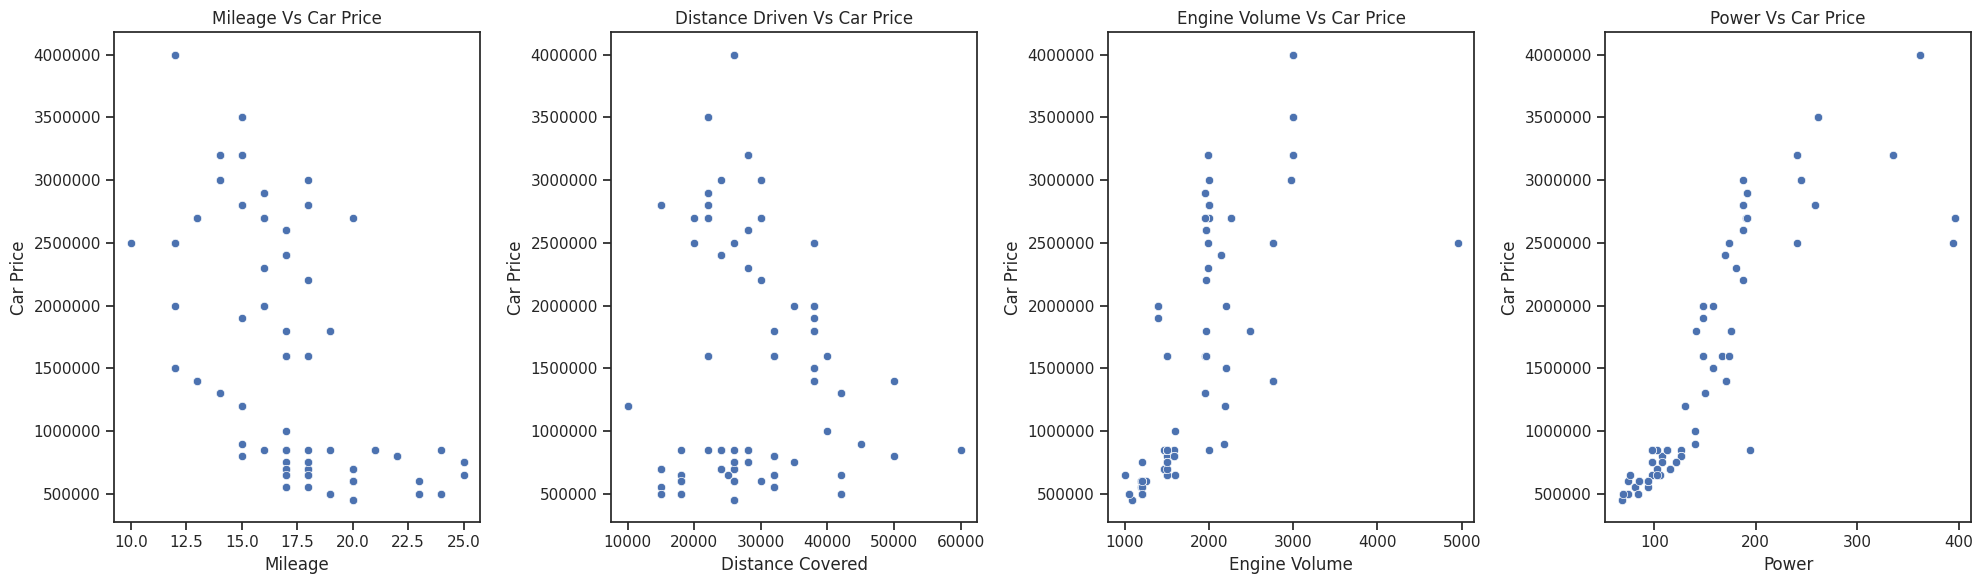

In [8]:
%matplotlib inline
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Plot 1: Mileage vs Price
sns.scatterplot(x='Mileage', y='Price', data=df, ax=axs[0])
axs[0].set_title('Mileage Vs Car Price')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Car Price')
axs[0].ticklabel_format(axis='y', style='plain')

# Plot 2: Kilometers Driven vs Price
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df, ax=axs[1])
axs[1].set_title('Distance Driven Vs Car Price')
axs[1].set_xlabel('Distance Covered')
axs[1].set_ylabel('Car Price')
axs[1].ticklabel_format(axis='y', style='plain')

# Plot 3: Engine vs Price
sns.scatterplot(x='Engine', y='Price', data=df, ax=axs[2])
axs[2].set_title('Engine Volume Vs Car Price')
axs[2].set_xlabel('Engine Volume')
axs[2].set_ylabel('Car Price')
axs[2].ticklabel_format(axis='y', style='plain')

# Plot 4: Power vs Price
sns.scatterplot(x='Power', y='Price', data=df, ax=axs[3])
axs[3].set_title('Power Vs Car Price')
axs[3].set_xlabel('Power')
axs[3].set_ylabel('Car Price')
axs[3].ticklabel_format(axis='y', style='plain')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

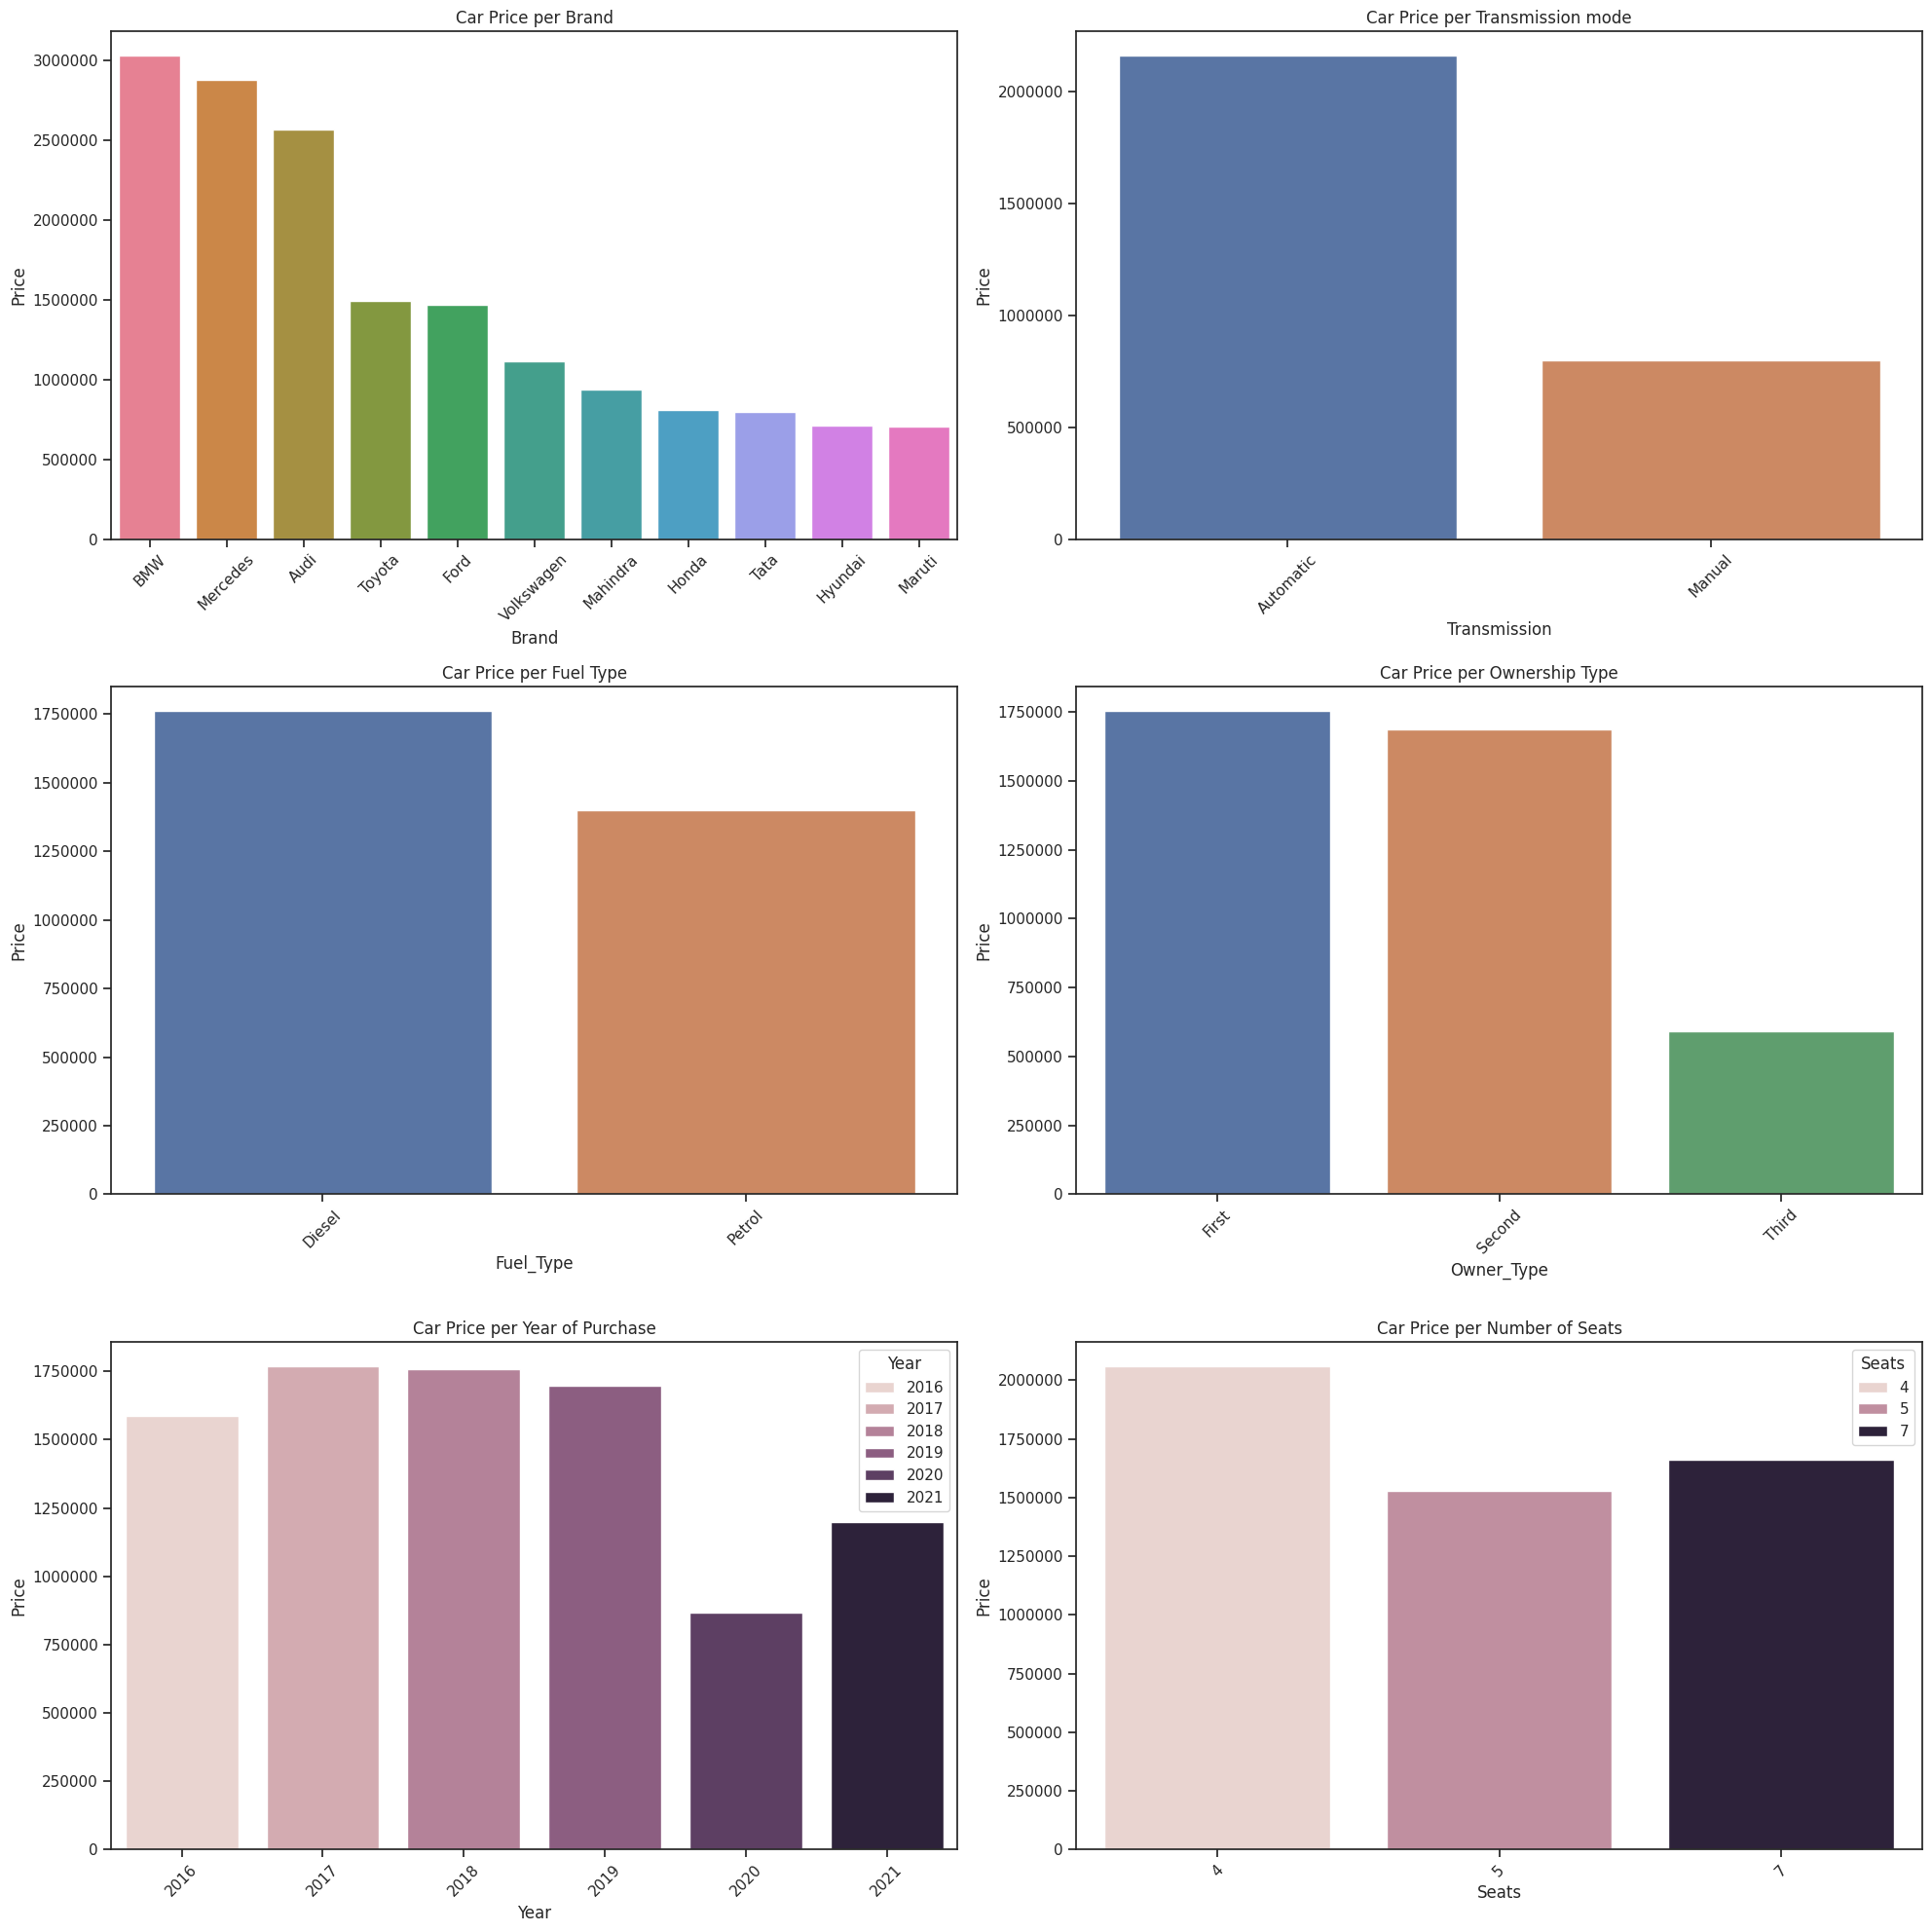

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# Plot 1: Car Price per Brand
bdf = pd.DataFrame(df.groupby('Brand')['Price'].agg('mean').sort_values(ascending=False)).reset_index()
sns.barplot(x='Brand', y='Price', data=bdf, ax=axs[0, 0], hue='Brand')
axs[0, 0].set_title('Car Price per Brand')
axs[0, 0].ticklabel_format(axis='y', style='plain')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Car Price per Transmission mode
tdf = pd.DataFrame(df.groupby('Transmission')['Price'].agg('mean').sort_values(ascending=False)).reset_index()
sns.barplot(x='Transmission', y='Price', data=tdf, ax=axs[0, 1],hue='Transmission')
axs[0, 1].set_title('Car Price per Transmission mode')
axs[0, 1].ticklabel_format(axis='y', style='plain')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Car Price per Fuel Type
fdf = pd.DataFrame(df.groupby('Fuel_Type')['Price'].agg('mean').sort_values(ascending=False)).reset_index()
sns.barplot(x='Fuel_Type', y='Price', data=fdf, ax=axs[1, 0],hue='Fuel_Type')
axs[1, 0].set_title('Car Price per Fuel Type')
axs[1, 0].ticklabel_format(axis='y', style='plain')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Car Price per Ownership Type
odf = pd.DataFrame(df.groupby('Owner_Type')['Price'].agg('mean').sort_values(ascending=False)).reset_index()
sns.barplot(x='Owner_Type', y='Price', data=odf, ax=axs[1, 1], hue='Owner_Type')
axs[1, 1].set_title('Car Price per Ownership Type')
axs[1, 1].ticklabel_format(axis='y', style='plain')
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: Car Price per Year of Purchase
ydf = pd.DataFrame(df.groupby('Year')['Price'].agg('mean').sort_values(ascending=False)).reset_index()
sns.barplot(x='Year', y='Price', data=ydf, ax=axs[2, 0], hue='Year')
axs[2, 0].set_title('Car Price per Year of Purchase')
axs[2, 0].ticklabel_format(axis='y', style='plain')
axs[2, 0].tick_params(axis='x', rotation=45)

# Plot 6: Car Price per Number of Seats
sdf = pd.DataFrame(df.groupby('Seats')['Price'].agg('mean').sort_values(ascending=False)).reset_index()
sns.barplot(x='Seats', y='Price', data=sdf, ax=axs[2, 1], hue='Seats')
axs[2, 1].set_title('Car Price per Number of Seats')
axs[2, 1].ticklabel_format(axis='y', style='plain')
axs[2, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# **Winsorizing, and Hot encoding the data**

In [12]:
# Pipeline for Skewed numeric variables
skewed_num_pipe  = Pipeline(steps = [("out", Winsorizer(capping_method='quantiles', tail='both', fold=.06))])
# Nominal categorical variables
nom_cat_pipe = Pipeline(steps = [("ohe", OneHotEncoder(sparse_output=False))])
# Ordinal Catgeorical variables
ord_cat_pipe = Pipeline(steps = [("ord", OrdinalEncoder())])

In [15]:
num_var=['Kilometers_Driven','Mileage','Engine','Power']
nom_var=['Brand','Model','Fuel_Type','Transmission']
ord_var=['Year','Seats','Owner_Type']

In [16]:
preprocessor = ColumnTransformer(transformers = [("nom", nom_cat_pipe, nom_var),
                                                 ("ord", ord_cat_pipe, ord_var),
                                                 ("skew", skewed_num_pipe, num_var)], remainder = "passthrough")
preprocessor.set_output(transform = "pandas")
preprocessor.fit(df)
df_processed = preprocessor.transform(df)

Index(['nom__Brand_Audi', 'nom__Brand_BMW', 'nom__Brand_Ford',
       'nom__Brand_Honda', 'nom__Brand_Hyundai', 'nom__Brand_Mahindra',
       'nom__Brand_Maruti', 'nom__Brand_Mercedes', 'nom__Brand_Tata',
       'nom__Brand_Toyota', 'nom__Brand_Volkswagen', 'nom__Model_3 Series',
       'nom__Model_5 Series', 'nom__Model_7 Series', 'nom__Model_A3',
       'nom__Model_A4', 'nom__Model_A5', 'nom__Model_A6', 'nom__Model_Altroz',
       'nom__Model_Ameo', 'nom__Model_Aspire', 'nom__Model_BR-V',
       'nom__Model_C-Class', 'nom__Model_Camry', 'nom__Model_City',
       'nom__Model_Civic', 'nom__Model_Corolla', 'nom__Model_Creta',
       'nom__Model_E-Class', 'nom__Model_EcoSport', 'nom__Model_Elantra',
       'nom__Model_Endeavour', 'nom__Model_Ertiga', 'nom__Model_Figo',
       'nom__Model_Fortuner', 'nom__Model_GLA', 'nom__Model_GLC',
       'nom__Model_GLE', 'nom__Model_Harrier', 'nom__Model_Innova',
       'nom__Model_Innova Crysta', 'nom__Model_Mustang', 'nom__Model_Nexon',
       'nom

In [17]:
df_processed.head()

,nom__Brand_Audi,nom__Brand_BMW,nom__Brand_Ford,nom__Brand_Honda,nom__Brand_Hyundai,nom__Brand_Mahindra,nom__Brand_Maruti,nom__Brand_Mercedes,nom__Brand_Tata,nom__Brand_Toyota,nom__Brand_Volkswagen,nom__Model_3 Series,nom__Model_5 Series,nom__Model_7 Series,nom__Model_A3,nom__Model_A4,nom__Model_A5,nom__Model_A6,nom__Model_Altroz,nom__Model_Ameo,nom__Model_Aspire,nom__Model_BR-V,nom__Model_C-Class,nom__Model_Camry,nom__Model_City,nom__Model_Civic,nom__Model_Corolla,nom__Model_Creta,nom__Model_E-Class,nom__Model_EcoSport,nom__Model_Elantra,nom__Model_Endeavour,nom__Model_Ertiga,nom__Model_Figo,nom__Model_Fortuner,nom__Model_GLA,nom__Model_GLC,nom__Model_GLE,nom__Model_Harrier,nom__Model_Innova,nom__Model_Innova Crysta,nom__Model_Mustang,nom__Model_Nexon,nom__Model_Passat,nom__Model_Polo,nom__Model_Q3,nom__Model_Q7,nom__Model_Ranger,nom__Model_S-Cross,nom__Model_Safari,nom__Model_Santro,nom__Model_Scorpio,nom__Model_Sonata,nom__Model_Swift,nom__Model_T-Roc,nom__Model_Thar,nom__Model_Tiago,nom__Model_Tigor,nom__Model_Tiguan,nom__Model_Vento,nom__Model_Venue,nom__Model_Verna,nom__Model_Vitara,nom__Model_WR-V,nom__Model_X1,nom__Model_X3,nom__Model_X5,nom__Model_XUV300,nom__Model_Yaris,nom__Fuel_Type_Diesel,nom__Fuel_Type_Petrol,nom__Transmission_Automatic,nom__Transmission_Manual,ord__Year,ord__Seats,ord__Owner_Type,skew__Kilometers_Driven,skew__Mileage,skew__Engine,skew__Power,remainder__Price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,42000,15.0,1498,108,800000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,40000,17.0,1597,140,1000000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,20000,12.0,2993,335,2500000
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,2.0,30000,23.0,1248,74,600000
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,42000,18.0,1999,194,850000


# **Train Test Splitting and Scaling Data before fitting the model**

In [24]:
X = df_processed.drop(columns=['remainder__Price'])
y = df_processed['remainder__Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# **Random Forest Regressor Model With Grid Search**

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Test RMSE: 158940411162.0
Test R²: 0.81


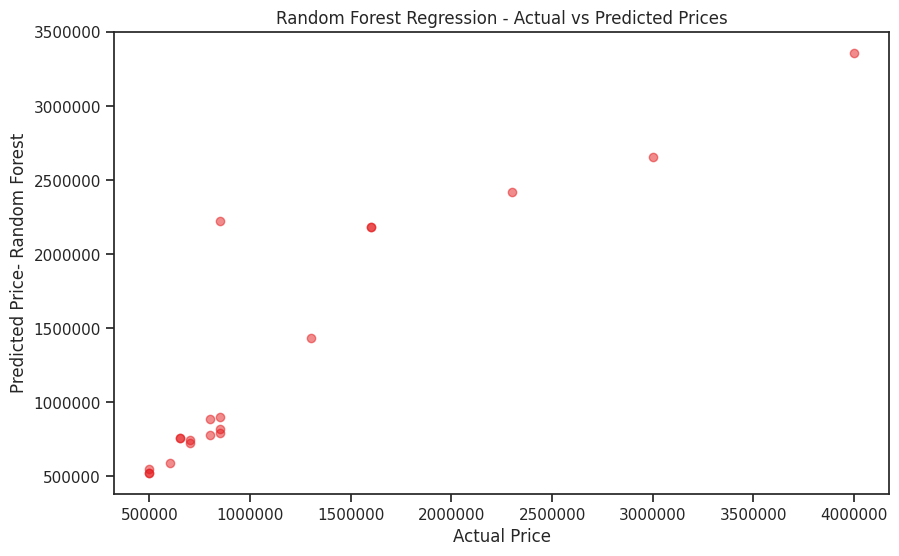

In [50]:
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)
y_pred_rf = best_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf).round()
r2_rf = r2_score(y_test, y_pred_rf).round(2)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test RMSE: {mse_rf}")
print(f"Test R²: {r2_rf}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.ticklabel_format(axis='y', style='plain')
plt.ticklabel_format(axis='x', style='plain')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price- Random Forest')
plt.title('Random Forest Regression - Actual vs Predicted Prices')
plt.show()

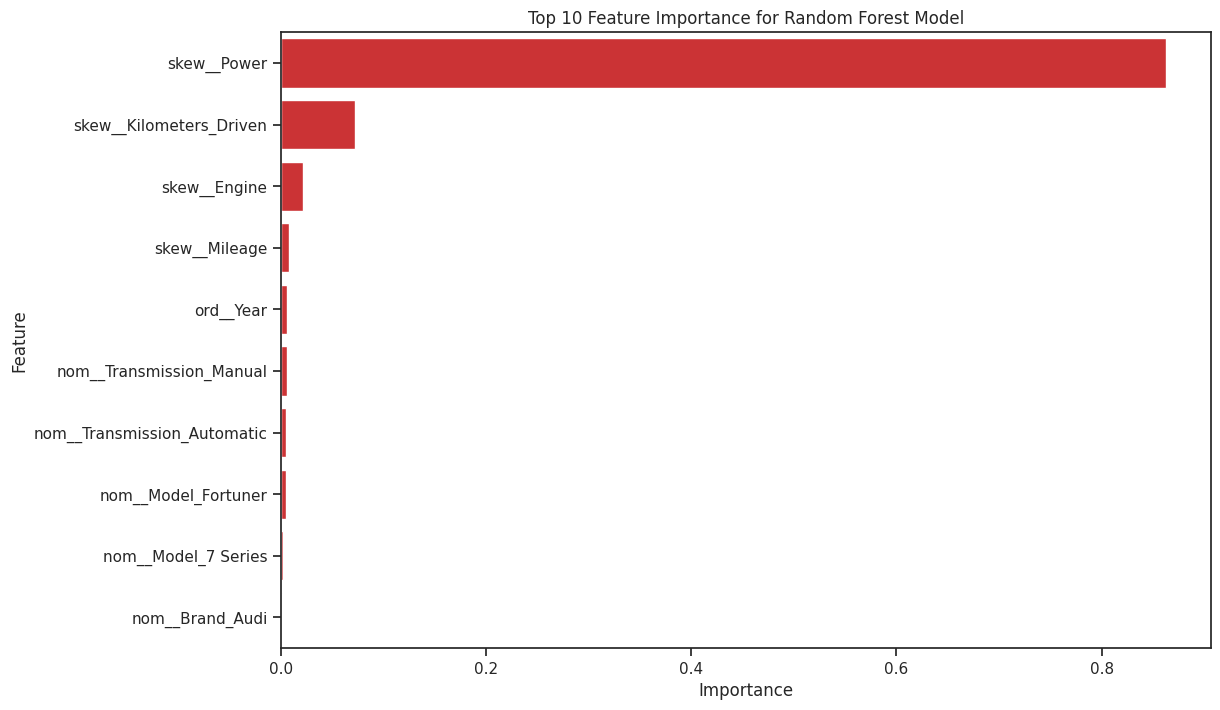

In [48]:
feature_importances = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importance_df.head(10)

# Plot top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **Lasso Regression Cross Validation Model**

Best alpha: 1000.0
Test R²: 0.91
MSE: 75391627226.0


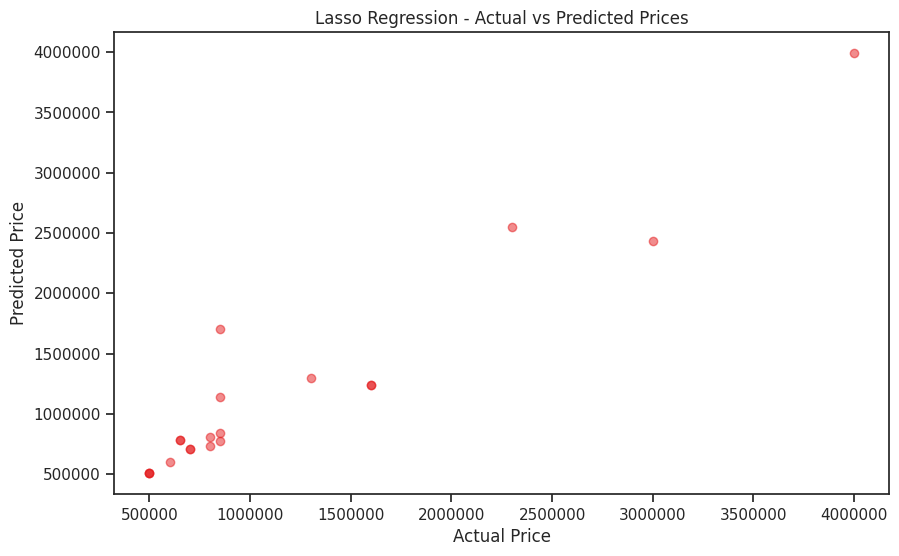

In [41]:
# Fit LassoCV to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Get the best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Train the Lasso model with the best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set
y_pred_l = lasso_model.predict(X_test_scaled)
mse_l = mean_squared_error(y_test, y_pred_l).round()
r2_l = r2_score(y_test, y_pred_l).round(2)
print(f"Test R²: {r2_l}")
print(f"MSE: {mse_l}")


# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_l, alpha=0.5)
plt.ticklabel_format(axis='y', style='plain')
plt.ticklabel_format(axis='x', style='plain')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression - Actual vs Predicted Prices')
plt.show()

The lasso model is better than the random forest regressor since the R2 values are much better and MSE values are lower for the Lasso Model.


In [46]:
# Identify non-zero coefficients
coef = lasso_model.coef_
zero_coef = coef == 0

# Map non-zero coefficients to predictors
not_selected_predictors = X.columns[zero_coef]

print("Selected Predictors:")
print(f'Predictors not selected {not_selected_predictors}')


Selected Predictors:
Predictors not selected Index(['nom__Brand_Ford', 'nom__Brand_Hyundai', 'nom__Brand_Maruti',
       'nom__Brand_Tata', 'nom__Brand_Toyota', 'nom__Brand_Volkswagen',
       'nom__Model_3 Series', 'nom__Model_5 Series', 'nom__Model_Altroz',
       'nom__Model_Aspire', 'nom__Model_Corolla', 'nom__Model_Creta',
       'nom__Model_GLA', 'nom__Model_Harrier', 'nom__Model_Nexon',
       'nom__Model_Passat', 'nom__Model_Q7', 'nom__Model_Safari',
       'nom__Model_Santro', 'nom__Model_Sonata', 'nom__Model_T-Roc',
       'nom__Model_Thar', 'nom__Model_Vitara', 'nom__Model_WR-V',
       'nom__Model_Yaris', 'ord__Seats', 'skew__Kilometers_Driven',
       'skew__Engine'],
      dtype='object')
